# Script to run a restart
This script run the model from a rest state during 10 years in order to produce a restart start.

In [24]:
## Import package
from neuralsw.model.shalw import SWmodel
import neuralsw
import neuralsw.model.modeltools as model
import numpy as np
import xarray as xr
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib notebook


In [26]:
## Specify the output
PLOT = True #if plot is wanted

#rootdir
rootdir = os.path.realpath(\
	os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#savefile (to check the run)
outname = os.path.join(datadir,'restartrun.nc')

#restartfile
rstfile = os.path.join(datadir,'restart_10years.nc')

#Duration of the integration
endtime = 48*30*12*10 #10 years

print('data directory:',datadir)


data directory: /Users/brajard/Documents/recherche/collaboration/bigdata/shallownn/data


In [22]:
## Init model
SW = SWmodel(nx=80,ny=80)
SW.initstate_cst(0,0,0)

#Save every month
SW.save(time=np.arange(0,endtime,48*30),name=outname)

In [23]:
# run the model
for i in tqdm(range(endtime)):
    SW.next()


  2%|▏         | 2682/172800 [00:05<05:50, 485.78it/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/brajard/anaconda/envs/nn/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/brajard/anaconda/envs/nn/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/brajard/anaconda/envs/nn/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 172800/172800 [04:50<00:00, 594.11it/s]


In [24]:
# Save the restart
SW.save_rst(rstfile)


<IPython.core.display.Javascript object>


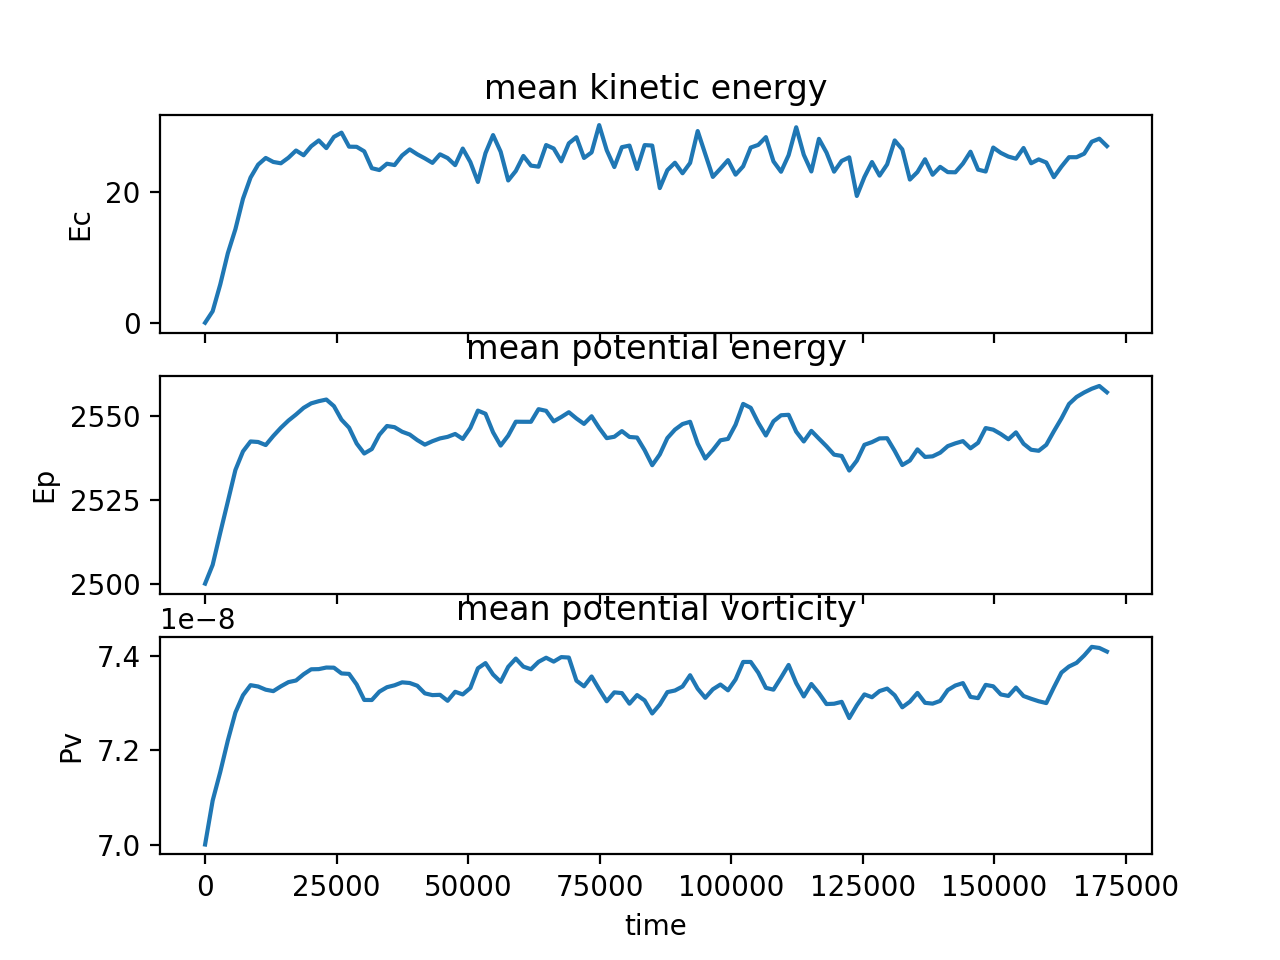

In [23]:
## Plots conservative quantities
if PLOT:
    ds = xr.open_dataset(outname)

    fig,ax = plt.subplots(nrows=3,sharex=True)
    Ec = model.cinetic_ener(ds=ds)
    Ep = model.potential_ener(ds=ds)
    Pv = model.potential_vor(ds=ds)
    Ec.plot(ax=ax[0])
    Ep.plot(ax=ax[1])
    Pv.plot(ax=ax[2])
    ax[0].set_title('mean kinetic energy')
    ax[0].set_ylabel('Ec')
    ax[0].set_xlabel('')
    ax[1].set_title('mean potential energy')
    ax[1].set_ylabel('Ep')
    ax[1].set_xlabel('')
    ax[2].set_title('mean potential vorticity')
    ax[2].set_ylabel('Pv')
    plt.show()